In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_pred_ds.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


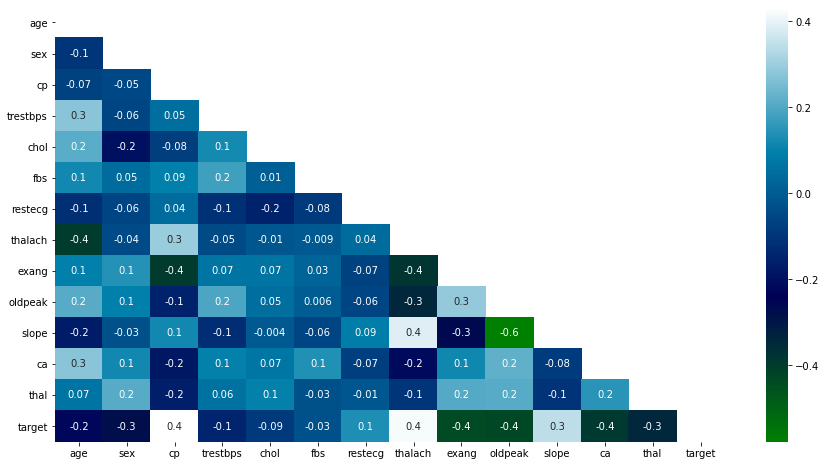

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),mask = mask,annot = True, fmt='.1g',ax=ax, cmap='ocean');

In [ ]:
logreg = sklearn.linear_model.LogisticRegression(C=1e20)

#fit the model 
X = logreg.fit(X_train, y_train)

#predict how well model fits the known data.
y_pred = logreg.predict(X_test)

train_log = logreg.score(X_train, y_train)
test_log = logreg.score(X_test, y_test)

print('Training Score: ',train_log)
print('Testing Score: ', test_log)

Training Score:  0.8349056603773585
Testing Score:  0.9120879120879121


In [ ]:
prediction_log_reg=X.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction_log_reg)
cm

array([[35,  5],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

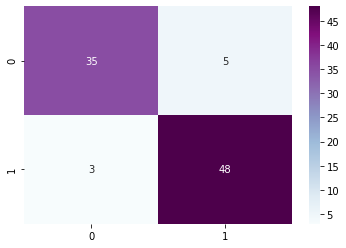

In [ ]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9120879120879121


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction_log_reg)

0.9120879120879121

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_log_reg))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.94      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



In [ ]:
from sklearn.svm import SVC
support_vector_machine=SVC(C = 1, kernel="linear",gamma=0.1)
model_svm=support_vector_machine.fit(X_train,y_train)
prediction_support_vector_machine=model_svm.predict(X_test)
confusion_matrix_svm= confusion_matrix(y_test,prediction_support_vector_machine)

In [ ]:
confusion_matrix_svm

array([[35,  5],
       [ 3, 48]], dtype=int64)

In [ ]:
accuracy_score(y_test, prediction_support_vector_machine)

0.9120879120879121

In [ ]:
print(classification_report(y_test, prediction_support_vector_machine))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.94      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



In [ ]:
# Experimentally determine which k gives the highest accuracy using recall and use this for model
recalls = []
ks = list(range(1,30))
for k in ks:
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
    neigh.fit(X_train, y_train)
    knn_hat = neigh.predict(X_test)
    knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
    recalls.append( sklearn.metrics.recall_score(y_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

Smallest k with highest score, 27 and score for k    0.912088
Name: 27, dtype: float64


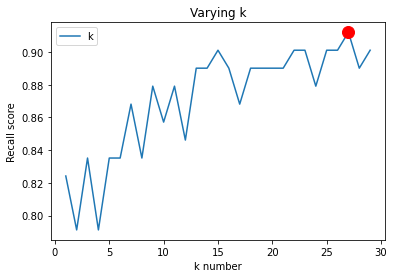

In [ ]:
kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

#plot the k we found using recall on plot. 
kdat.plot();
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [ ]:
#train knn model using experimentally determied k
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=27)

In [ ]:
knn_hat = neigh.predict(X_test)

In [ ]:
# return the knn models report for how well it worked
knn_cm = sklearn.metrics.confusion_matrix(y_test, knn_hat)
print('KNN(', k,') confusion matrix is = \n', '\n',knn_cm,'\n')
print('Success = ', knn_cm[1,1] / (knn_cm[1,0] + knn_cm[1,1]),'\n')
knn_cr = sklearn.metrics.classification_report(y_test, knn_hat)
print(knn_cr)

#scores
knn_score_train = round(neigh.score(X_train, y_train),3)
knn_score_test = round(neigh.score(X_test, y_test),3)
print('Training Score: ',knn_score_train)
print('Testing Score: ',knn_score_test)

KNN( 27 ) confusion matrix is = 
 
 [[33  7]
 [ 1 50]] 

Success =  0.9803921568627451 

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        40
           1       0.88      0.98      0.93        51

    accuracy                           0.91        91
   macro avg       0.92      0.90      0.91        91
weighted avg       0.92      0.91      0.91        91

Training Score:  0.811
Testing Score:  0.912


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forest= RandomForestClassifier(n_estimators = 1000, random_state=10,max_depth=7, n_jobs=-1) #n_estimator = DT
rand_forest.fit(X_train,y_train) 
pred_rand_forest = rand_forest.predict(X_test)
confusion_matrix(y_test, pred_rand_forest)

array([[34,  6],
       [ 6, 45]], dtype=int64)

In [ ]:
accuracy_score(y_test, pred_rand_forest)

0.8681318681318682

In [ ]:
print(classification_report(y_test, prediction_rand_forest))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



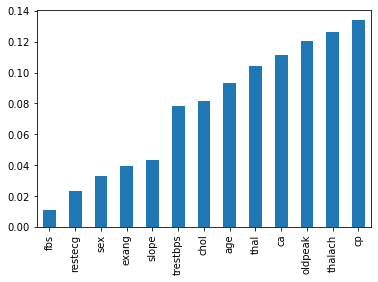

In [ ]:
importances = rand_forest.feature_importances_
importances = pd.DataFrame(importances,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
importances=importances.rename(columns={0: "Features_Importance"})
importances  = importances.Features_Importance.sort_values()
importances.plot.bar();